In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import itertools
import tensorflow as tf
from keras.layers import Dropout
from keras import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample

250 images no array
500 images no array
750 images no array
1000 images no array
1250 images no array
1500 images no array
1750 images no array
2000 images no array
2250 images no array
Todas imagens no array!


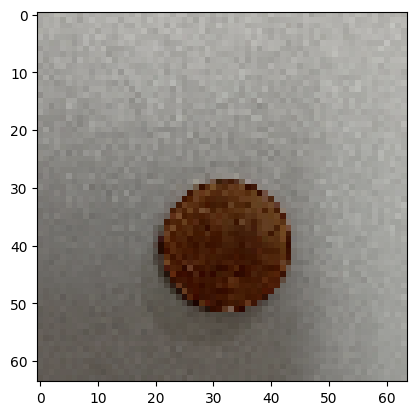

moeda reconhecida: 5


In [2]:
folder = '../datasetNovoComAntigo'

image_width = 64
image_height = 64
channels = 3

train_files = []
i=0
for coin in ['5', '10', '25', '50', '100']:
    onlyfiles = [f for f in os.listdir(folder + '/' + str(coin)) if os.path.isfile(os.path.join(folder + '/' + str(coin), f))]
    for _file in onlyfiles:
        train_files.append(_file)

dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels), dtype=np.float32)
y_dataset = []

i = 0
for coin in ['5', '10', '25', '50', '100']:
    onlyfiles = [f for f in os.listdir(folder + '/' + str(coin)) if os.path.isfile(os.path.join(folder + '/' + str(coin), f))]
    for _file in onlyfiles:
  ###
        img = cv2.imread(os.path.join(folder, coin, _file))
        img_resized = cv2.resize(img, (image_width, image_height))

        dataset[i] = img_resized
        mapping = {'5': 0, '10': 1, '25': 2, '50': 3, '100': 4, }
        y_dataset.append(mapping[coin])
   ###

        i += 1
        if i % 250 == 0:
            print("%d images no array" % i)
print("Todas imagens no array!")

# normalizando os dados
dataset = dataset.astype('float32')
dataset /= 300

pixels = np.array(dataset[0], dtype='float32')
plt.imshow(cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB))
plt.show()
plt.close()
n_classes = len(set(y_dataset))
print('moeda reconhecida:', n_classes)

y_dataset_ = to_categorical(y_dataset, n_classes)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y_dataset_, test_size=0.2)
print("Tamanho da pasta de treino: {0}, Tamanho da pasta de teste: {1}".format(len(X_train), len(X_test)))

Tamanho da pasta de treino: 1818, Tamanho da pasta de teste: 455


In [4]:
read_model = tf.keras.models.load_model('../modelo/mode_acurracy90TesteDia30as23hrs.h5')
read_model.summary()



Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_17 (Ba  (None, 64, 64, 3)         12        
 tchNormalization)                                               
                                                                 
 conv2d_51 (Conv2D)          (None, 60, 60, 128)       9728      
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 30, 30, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_68 (Dropout)        (None, 30, 30, 128)       0         
                                                                 
 conv2d_52 (Conv2D)          (None, 28, 28, 64)        73792     
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 14, 14, 64)    

In [5]:
history = pd.read_csv('../modelo/loss.csv')
history.head(11)

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
0,0,1.273612,0.465612,1.519597,0.351648
1,1,0.798919,0.676754,1.204941,0.717033
2,2,0.651817,0.733838,1.009979,0.750000
3,3,0.579263,0.768913,0.818502,0.807692
4,4,0.538144,0.790922,0.618613,0.843407
5,5,0.446475,0.824622,0.507272,0.824176
6,6,0.368366,0.854195,0.388361,0.854396
7,7,0.406746,0.850069,0.374920,0.865385
8,8,0.381454,0.856259,0.308144,0.909341
9,9,0.332110,0.870014,0.274558,0.903846


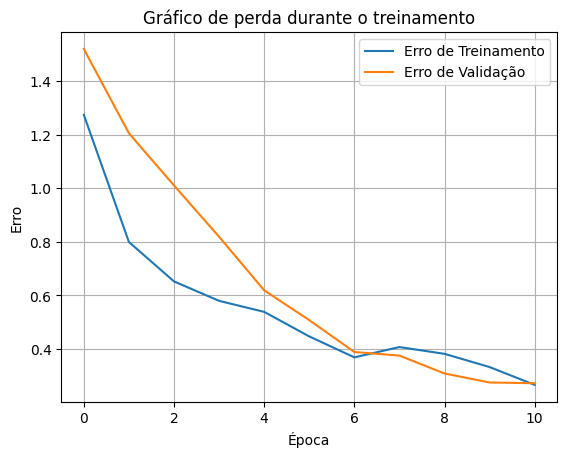

In [6]:
# Visualizar a perda durante o treinamento
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Gráfico de perda durante o treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend(['Erro de Treinamento', 'Erro de Validação'])
plt.grid()
plt.show()

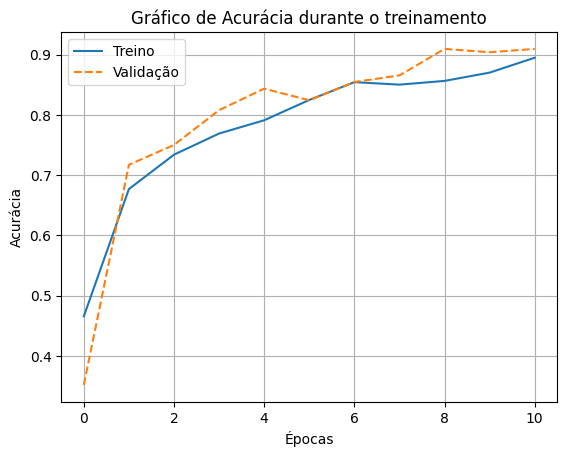

In [7]:
# Plotando o treinamento e a validação da accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'], '--')
plt.title('Gráfico de Acurácia durante o treinamento')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Treino', 'Validação'])
plt.grid()
plt.show()

15/15 [==============================] - 6s 318ms/step


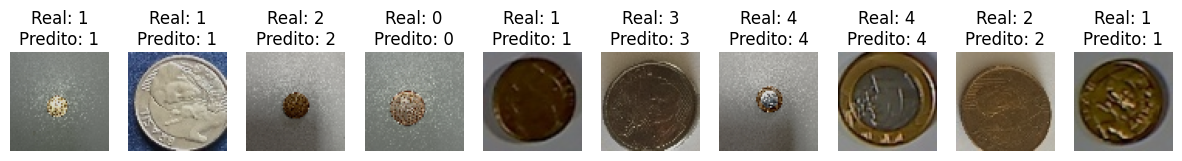

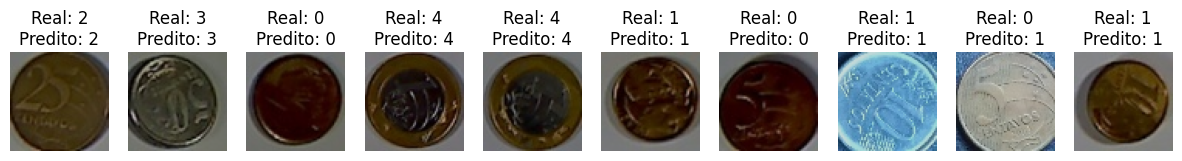

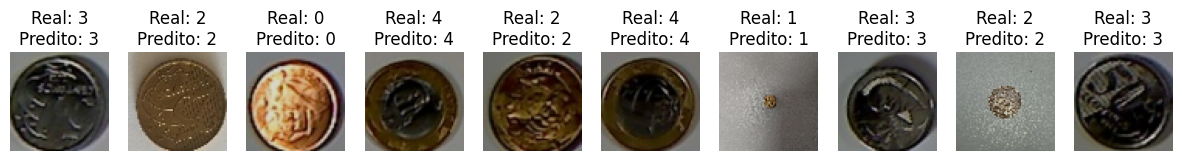

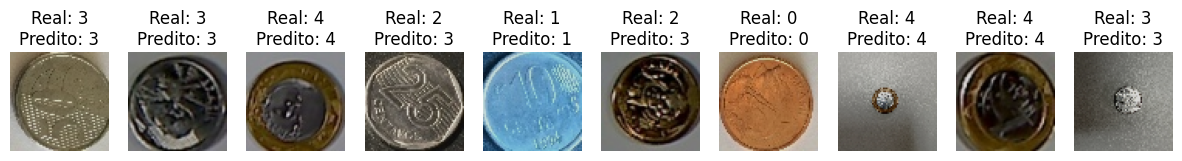

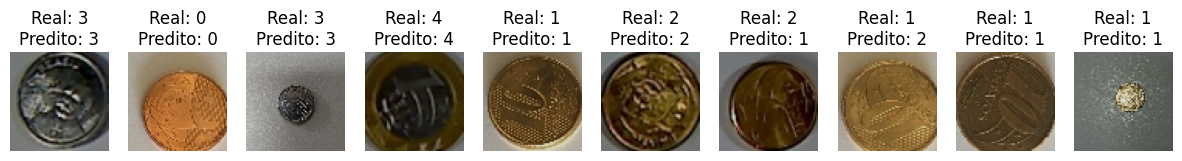

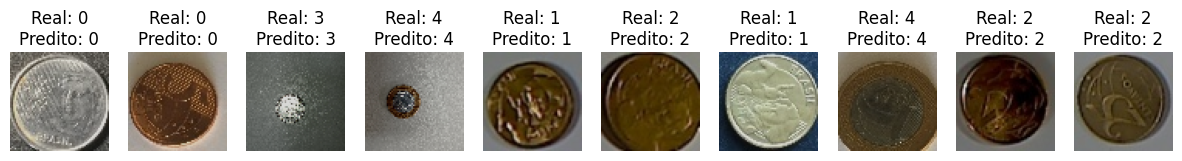

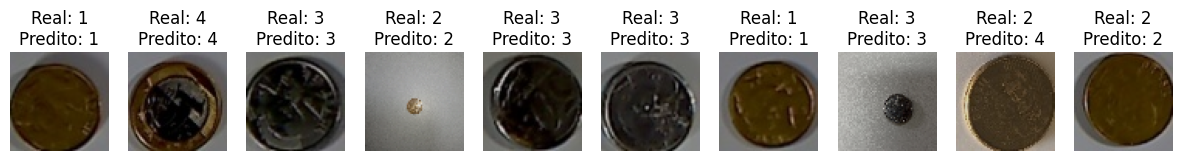

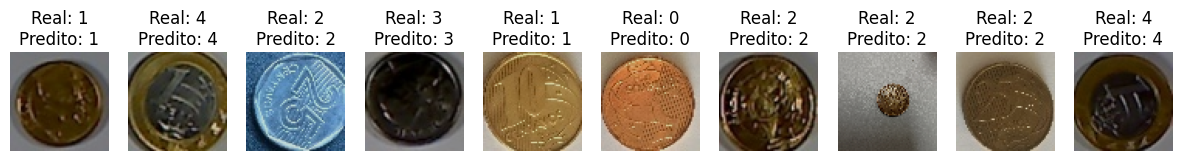

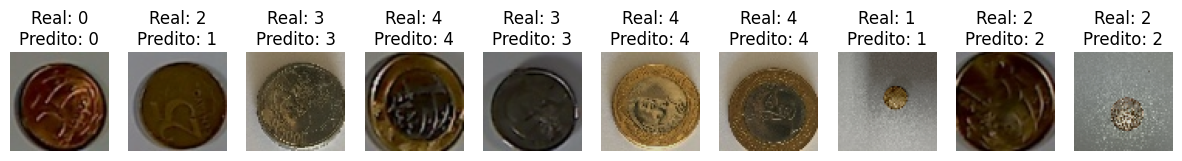

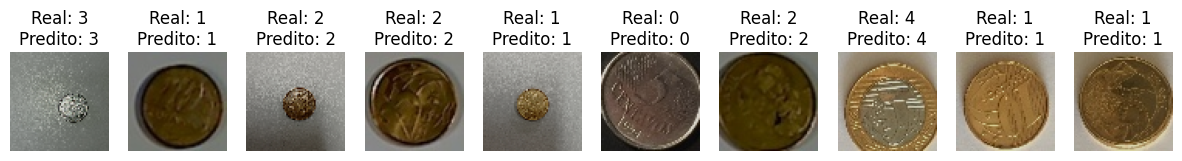

In [8]:
preds = read_model.predict(X_test)

n = 10
for t in range(10):
    plt.figure(figsize=(15,15))
    for i in range(n*t, n*(t+1)):
        plt.subplot(1, n, i + 1 - n*t)
        plt.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB), cmap='gray')
        plt.title('Real: {}\nPredito: {}'.format(np.argmax(y_test[i]), np.argmax(preds[i])))
        plt.axis('off')
    plt.show()

In [9]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Matriz de Confusão', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão normalizada")
    else:
        print('Matriz de Confusão, sem normalização')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe Real')
    plt.xlabel('Classe Predita')

Matriz de Confusão, sem normalização
[[ 69   3   5   3   0]
 [  1  86   3   2   0]
 [  2   8  83   4   1]
 [  0   0   0 103   0]
 [  0   0   0   1  81]]


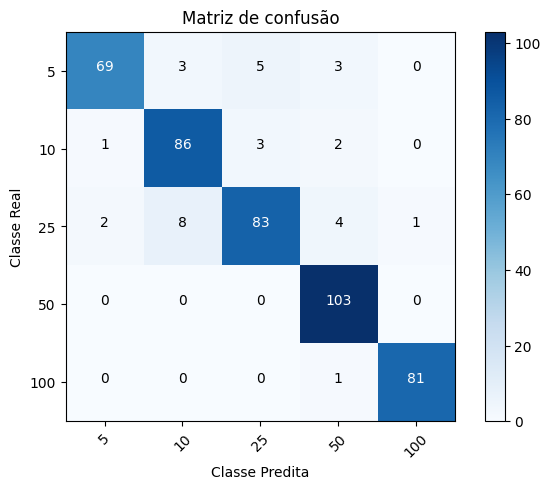

In [10]:
# Convertendo as previsões e os rótulos de volta para as classes originais
y_test_ = [np.argmax(x) for x in y_test]
preds_ = [np.argmax(x) for x in preds]

# Gerando gráfico
cm = confusion_matrix(y_test_, preds_)
plt.figure()
plot_confusion_matrix(cm, classes=['5', '10', '25', '50', '100'], title='Matriz de confusão')
plt.show()

In [11]:
loss, accuracy = read_model.evaluate(X_test, y_test)
print("Perda: ", loss)
print("Acurácia: {:.2f}%".format(accuracy * 100))


15/15 [==============================] - 6s 312ms/step - loss: 0.2160 - accuracy: 0.9275
Perda:  0.21600928902626038
Acurácia: 92.75%


In [12]:
# Calcular acurácia
accuracy = accuracy_score(y_test_, preds_)
print("Acurácia: {:.2f}%".format(accuracy * 100))

# Calcular precisão
precision = precision_score(y_test_, preds_, average='macro')
print("Precisão: {:.2f}%".format(accuracy * 100))

# Calcular recall
recall = recall_score(y_test_, preds_, average='macro')
print("Recall: {:.2f}%".format(accuracy * 100))

# Calcular F1 score
f1 = f1_score(y_test_, preds_, average='macro')
print("F1-score: {:.2f}%".format(f1 * 100))

Acurácia: 92.75%
Precisão: 92.75%
Recall: 92.75%
F1-score: 92.76%


In [14]:
# save model structure in jason file
model_json = read_model.to_json()
with open("emotion_modelcnn90valAcc.json", "w") as json_file:
    json_file.write(model_json)